# Introduction to Bayesian Statistics

GNOME bootcamp
August 17, 2016

### Overview

 * Bayes's Law

In [1]:
# Preliminaries
import numpy
import scipy.special
import scipy.stats
import pandas
import seaborn
import matplotlib
from matplotlib import pyplot
%matplotlib inline

## Conditional Probability

In the previous notebook, we established that a joint probability distribution was the product of the individual trials, if and only if the trials were independent. What if they are not? Then we need the concept of the _conditional probability_. We make the following definition:

$$
p(A|B) = p(A,B)/p(B)
$$

This is read as "The probability of A given B is defined as the joint probability of A _and_ B divided by the probability of B."

### Example

When rolling two fair die, what is the probability of the first rolling a two, if the total of the dice roll is less than or equal to 6. In other words what is $p(A=2|A+B \leq 6)$?.

From intuition, we know that $p(A=2) = 1/6$, but we are constrained that the total roll will be less than or equal to 6. What are the possible ways to get $A+B \leq 6$? Let's do the cases imvolving $A=2$ first.

<pre>
A   B
2 + 1
2 + 2
2 + 3
2 + 4
</pre>

So there are 4 possibilities. We can construct the other possibilities in a similar way. For $A=1$, there are 5 possibilities. For $A=3$ there is 3, for $A=4$ is there 2, and $A=5$ there is 1. So there are $5+4+3+2+1$ possibilities. We know, now, that one can only roll a two one the first die in four of them. Therefore $p(A=2|A+B\leq6) = 4/(5+4+3+2+1) = 4/15 > 1/6$. You are more likely to see a 2 when rolls greater than 6 are excluded. As one increases the total die roll, the conditional probability approaches the independent probability as all outcomes become possible.

It should be noted that the *joint probability* of $p(A=2,B)$ is still 1/6 since rolling $B$ has no effect on $A$. The joint probability is still the product of the two because it is independent.

## Bayes's Law

Bayes's Law is derivable from axiomatic probability theory. We state it here without any proof, other than what we've already stated about condiitonal probability above. The ratio of $p(A)$ to $p(B)$ is manipulated to a form familiar as Bayes's Law:

$$
p(A|B) = \frac{p(A)p(B|A)}{p(B)}
$$

In this context $p(A|B)$ is called the _posterior_ probability, $p(A)$ is called the _prior_ probability, and $p(B|A)$ is called the likelihood.

We now will employ this to reverse a topic from earlier. Suppose I want to know if a coin is fair based on a set of flips. How would I go about doing this with Bayes' Law? In effect, the posterior is telling us the information we want to know. Stated in the context of the problem, we want the distribution of the parameter $p$ (I'll call it $q$ here so there's no confusion) in the Bernoulli trial. We can actually do this analytically. If we do $N$ flips, and obtain $k$ successes, then the probability of getting these outcomes is moderated by the binomial distribution. This is $p(k|q)$, the probability of a given number of successes given the "fairness" parameter $q$.

Now, the prior encodes how probable "a priori" we think an outcome is. In general, if we don't have information either way, the prior should be constructed to give equal weight to all possible outcomes. So, in this case, we'll use a uniform distribution on $q\in(0,1)$. It is equally likely to be fair or totally biased.

$$
p(q|k) = \frac{1 \times {N \choose k} q^k(1-q)^{N-k}}{p(k)}
$$

The denominator can be shown to be $p(B) = \int p(A)p(B|A)dA$ or the equivalent sum by the definition of conditional probability, but also notice that this is just the integral of numerator. So:

$$
p(k) = \int q^k(1-q)^{N-k} dq
$$

When expanding the denominator, the "chooses" cancel out and we're left with

$$
\frac{q^k(1-q)^{N-k}}{\int q^k(1-q)^{N-k} dq}
$$

It may not be obvious, but the denominator is the special function called the Beta function ($B(\alpha,\beta)$) with parameters $\alpha=k+1,\beta=N-k+1$. It can also be expressed as a Gamma function $B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$. So, finally:

$$
p(q|k)=\frac{q^k(1-q)^{N-k}}{B(k+1,N-k+1)}
$$

Let's plot a little.

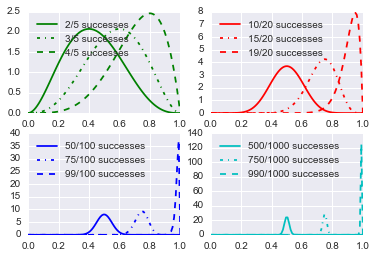

In [11]:
q = numpy.linspace(0, 1, 100)
N = (5, 20, 100, 1000)
k_frac = (0.5, 0.75, 0.99)

colors = ['g', 'r', 'b', 'c']
typ = ['-', '-.', '--']

for i, n in enumerate(N):
    pyplot.subplot(2, 2, i+1)
    for kf in k_frac:
        k = int(kf * n)
        pos = q**k*(1-q)**(n-k)
        pos /= scipy.special.beta(k+1, n-k+1)
        pyplot.plot(q, pos, color=colors[0], linestyle=typ[0], label="%d/%d successes" % (k, n))
        typ.append(typ.pop(0))
    pyplot.legend(loc="upper left")
        
    colors.append(colors.pop(0))

Again, recall, though, that the probability of it being *exactly* fair is zero. These are *densities*. However, we can integrate around the peak, or identify the peak of the distribution which provides some information. The mean and width also have meaning.

The main thing here is to consider the *width* and *bias* of the distributions. When there are many more successes (e.g. heads) versus a more even outcome of the trials, the distribution is biased towards higher values of $q$ --- the coin is more likely to be biased. When the number of flips is relatively small (e.g. $N=5$), then the posterior is wide! One way of encoding this information is the 90% credible interval. Where does the majority (in this case 90%) of the probability lie?

### Exercise

Compute and mark the mean, compute variance, and plot the 90% intervals for each of the distributions above in the case that $k_{\textrm{frac}} = 0.75$. Hint: this is just the Beta distribution! (and wikipedia knows about it)

**Answer**

One can do this analytically, but these values are already computed for this distribution.

$$
E[X|\alpha,\beta] = \frac{\alpha}{\alpha + \beta}
$$

and the variance

$$
\text{Var}[X|\alpha,\beta] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

The 90% credible interval is a little harder. One has to choose where to start. Generally, the algorithms are *greedy*. One starts from the peak and integrates outward until 90% is hit. It is also perfectly legitimate to construct others. One procedure is the following.

N=5, width 1.75e-01
N=20, width 9.29e-02
N=100, width 4.29e-02
N=1000, width 1.37e-02


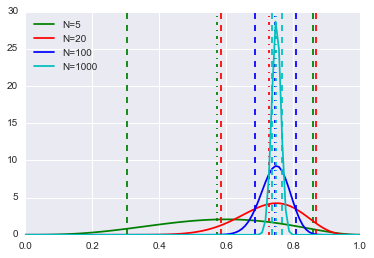

In [26]:
q = numpy.linspace(0, 1, 100)
dq = q[1] - q[0]
N = (5, 20, 100, 1000)
k_frac = 0.75

colors = ['g', 'r', 'b', 'c']

for i, n in enumerate(N):
    k = int(n*k_frac)
    pos = q**k*(1-q)**(n-k)
    pos /= scipy.special.beta(k+1, n-k+1)
    pyplot.plot(q, pos, color=colors[0], label="N=%d" % n)
    pyplot.legend(loc="upper left")
    a, b = k+1, n-k+1
    mean = a/float(a+b)
    var = float(a*b)/((a+b)**2*(a+b+1))
    print "N=%d, width %1.2e" % (n, numpy.sqrt(var))
    pyplot.axvline(mean, color=colors[0], linestyle='-.')
    
    # Confidence intervals
    pos_srt = pos.argsort()[::-1]
    idx_90 = numpy.searchsorted(pos[pos_srt].cumsum() * dq, 0.9)
    pos_srt_90 = pos_srt[:idx_90]
    left, right = q[pos_srt_90].min(), q[pos_srt_90].max()
    pyplot.axvline(left, color=colors[0], linestyle='--')
    pyplot.axvline(right, color=colors[0], linestyle='--')
        
    colors.append(colors.pop(0))

### Exercise

Make up a new prior and see how it changes the answer. In order to not make things too complicated, you can just make one interval more probable than others. Remember to keep your distribution normalized!